# Parent's Education

Correlation between school grades and parents' educational level.

- Date: 2019-01-30
- Source: [Skolverket](https://skolverket.se/skolutveckling/statistik/sok-statistik-om-forskola-skola-och-vuxenutbildning)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.plot import ds_style

%config InlineBackend.figure_format = 'retina'

# Custom chart style
if 'datastory' in plt.style.available:
    plt.style.use('datastory')

## Load and transform

In [2]:
def load_data(fname, skiprows):
    path = f'../data/raw/skolverket/{fname}.xlsx'
    return pd.read_excel(path, skiprows=skiprows, dtype={'Skol-enhetskod': str})

In [3]:
variables = {
    'Elever, årskurs 9': 'students',
    'Föräldrarnas genomsnittliga utb.nivå': 'par_ed',
    'Faktiskt värde (F).1': 'merit',
    'Skola': 'name',
    'Skol-enhetskod': 'id'
}

grades = (load_data('exp_salsa_2018', 6)
    .rename(columns=variables)
    .filter(items=variables.values()))

In [4]:
students = (load_data('exp_elever_gr_2017', 5)
    .rename(columns=variables)
    .filter(items=['id', 'students']))

In [5]:
df = pd.merge(grades, students, on='id', how='left')

In [6]:
df.students = (df.students
    .astype(str)
    .replace('.', None)
    .astype(float))

# A few schools have missing data for students
df.students = df.students.fillna(df.students.mean())

## Overview

In [7]:
df.head()

,par_ed,merit,name,id,students
0,2.29,241,Ahlafors Fria skola,71387206,45.0
1,2.24,226,Aroseniusskolan,48529699,137.0
2,2.18,233,Bohusskolan,11043800,72.0
3,2.16,213,Da Vinciskolan,61084420,137.0
4,2.43,216,Gustav Adolfsskolan,74064638,100.0


In [8]:
df.shape

(1452, 5)

## Plot

In [9]:
# Split data in 3 quantiles of parents' education, and set color accordingly
df['color'] = pd.qcut(df.par_ed, 3, labels=['#f72f1c', '#a1a1a3', '#35c983'])

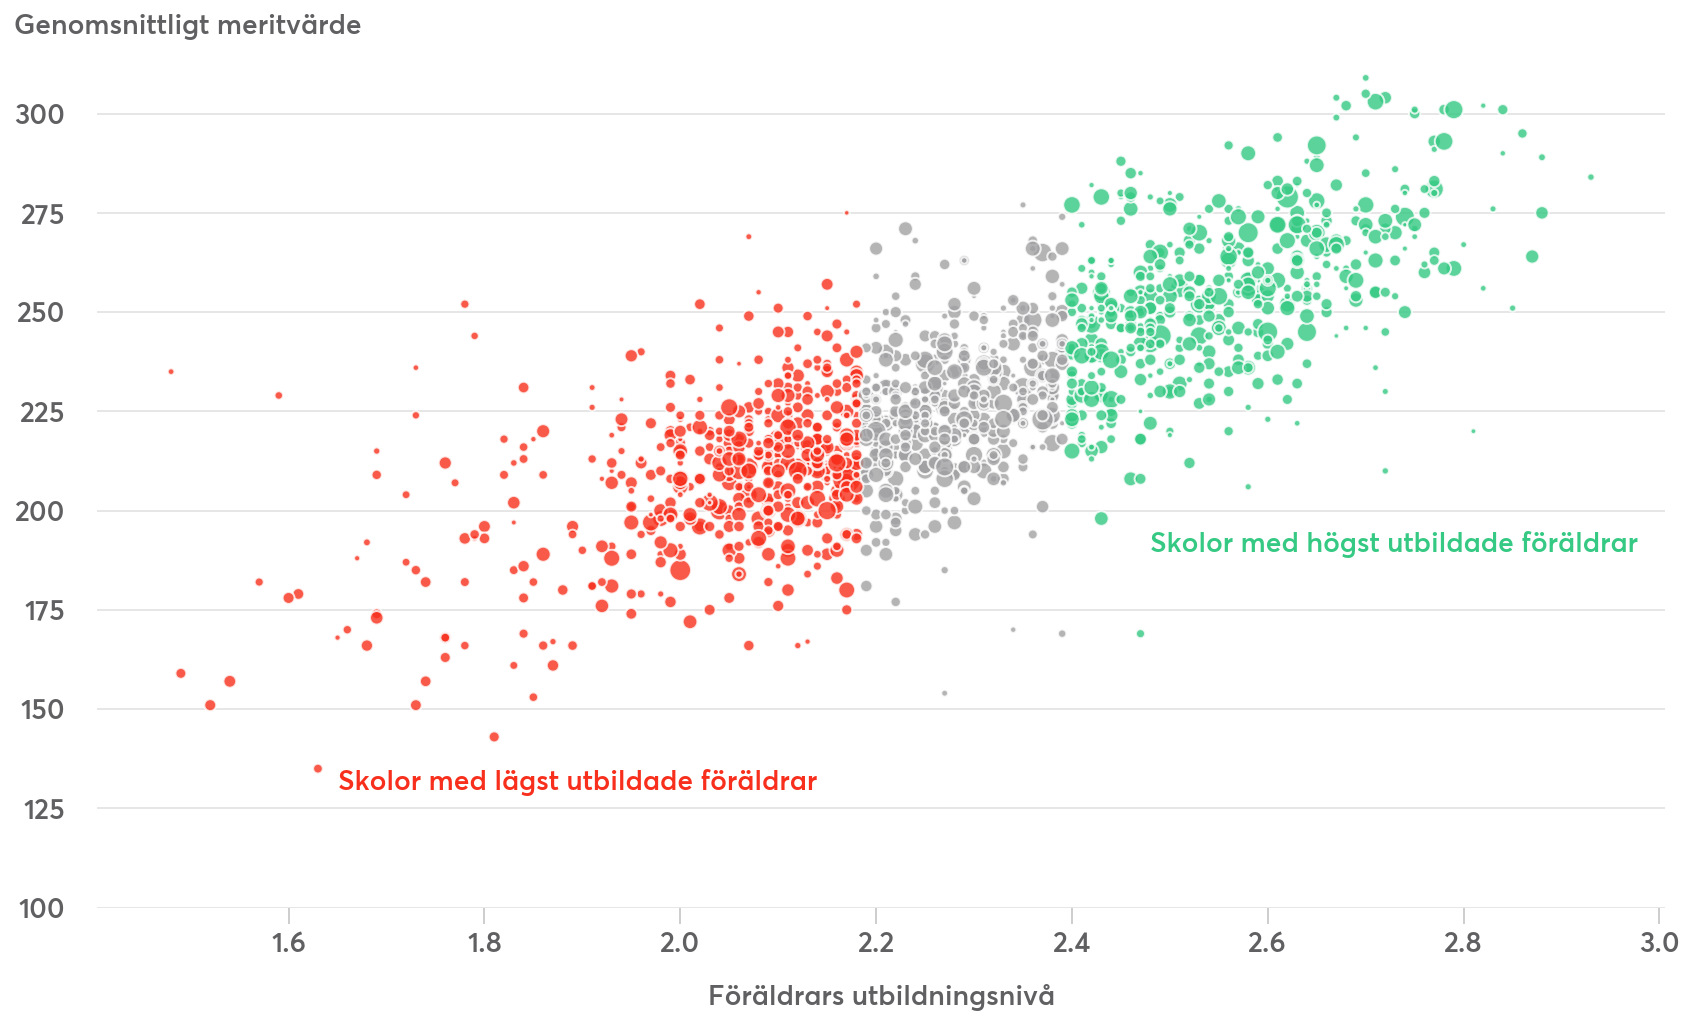

In [15]:
w = 12
h = w * 0.597
figsize = (w, h)
fig, ax = plt.subplots(figsize=figsize)

# Font settings
fd = {'size': 14, 'weight': 500, 'color': '#606062'}
args = dict(fontdict=fd, backgroundcolor='white', ha='left', va='top')

ax.scatter(x=df.par_ed, y=df.merit, color=df.color, alpha=0.8,
           s=df.students / 2, lw=1, edgecolors='#ffffff', zorder=3)

ax.set_xlabel('Föräldrars utbildningsnivå', fontdict=fd, color='#606062', labelpad=13)
ax.set_ylabel('')
ax.set_ylim(100, 320)

ax.text(1.32, 320, 'Genomsnittligt meritvärde', fontdict=fd)
ax.text(1.65, 135, 'Skolor med lägst utbildade föräldrar', color='#f72f1c', **args)
ax.text(2.48, 195, 'Skolor med högst utbildade föräldrar', color='#35c983', **args)

plt.tight_layout(pad=1)

ds_style(ax)

fig.set_facecolor('#ffffff')
fig.savefig('../charts/parents-education.png')